### **파이썬을 활용한 빅데이터 분석**

##### Chapter 10 기타 기계학습을 이용한 데이터 분석(K-Nearest Neighbors)(2)

##### 2020710058 Applied Data Science Doo-yeonog, Lee

##### Breast Cancer Data 분류

In [2]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer

In [9]:
# Load a Dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

df = pd.DataFrame(X, columns = breast_cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [29]:
# Split data into train sets and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print('The number of train data set: ', len(X_train))
print('The number of test data set: ', len(X_test))

The number of train data set:  381
The number of test data set:  188


In [30]:
# Learning Model
estimator = KNeighborsClassifier(n_neighbors = 3)
estimator.fit(X_train, y_train)
label_predict = estimator.predict(X_test)
print('The accuracy score of classification: %0.4f'%accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.9415


In [31]:
# 10-fold cross validation
myList = list(range(1, 50))
neighbors = [ x for x in myList if x % 2 != 0 ]
print(neighbors)
print("The number of neighbors: ", len(neighbors))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The number of neighbors:  25


In [36]:
cv_scores = []
for k in neighbors:
    print(' < k = %d >'%k)
    estimator = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(estimator, X_train, y_train, cv = 10, scoring = 'accuracy')
    print('The scores of classification: ', scores)
    cv_scores.append(scores.mean())
    print('The mean score of scores: ', scores.mean())

 < k = 1 >
The scores of classification:  [0.97435897 0.84210526 0.92105263 0.97368421 0.81578947 0.89473684
 0.89473684 0.89473684 0.89473684 0.84210526]
The mean score of scores:  0.8948043184885289
 < k = 3 >
The scores of classification:  [0.94871795 0.86842105 0.89473684 0.94736842 0.94736842 0.89473684
 0.86842105 0.89473684 0.94736842 0.81578947]
The mean score of scores:  0.9027665317139002
 < k = 5 >
The scores of classification:  [0.94871795 0.86842105 0.89473684 0.94736842 0.94736842 0.92105263
 0.94736842 0.86842105 0.92105263 0.81578947]
The mean score of scores:  0.9080296896086371
 < k = 7 >
The scores of classification:  [0.97435897 0.84210526 0.89473684 0.94736842 0.94736842 0.92105263
 0.92105263 0.86842105 0.92105263 0.84210526]
The mean score of scores:  0.9079622132253711
 < k = 9 >
The scores of classification:  [0.97435897 0.84210526 0.86842105 0.94736842 0.92105263 0.92105263
 0.94736842 0.86842105 0.89473684 0.81578947]
The mean score of scores:  0.900067476383

Optimal K:  13


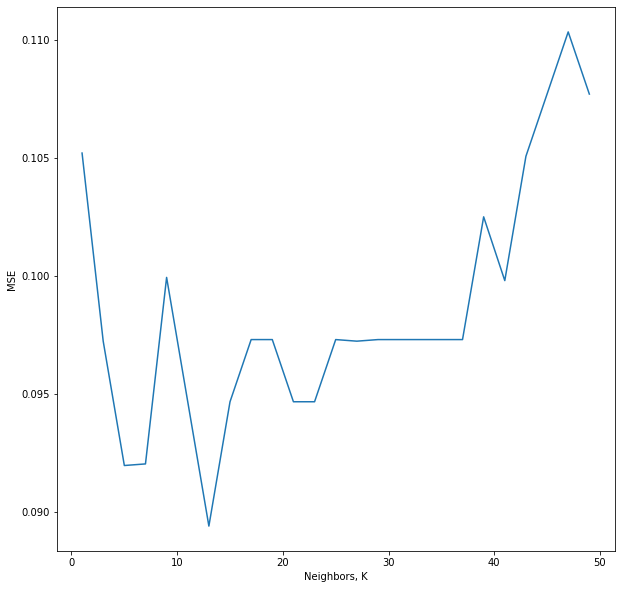

In [43]:
# MSE
MSE = [1 - x for x in cv_scores]
plt.figure(figsize = (10,10))
plt.plot(neighbors, MSE)
plt.xlabel('Neighbors, K')
plt.ylabel('MSE')

min_MSE = min(MSE)
index_min_MSE = MSE.index(min_MSE)
optimal_k = neighbors[index_min_MSE]
print('Optimal K: ', optimal_k)

In [45]:
# KNN with optimal K
estimator = KNeighborsClassifier(n_neighbors = optimal_k)
estimator.fit(X_train, y_train)
label_predict = estimator.predict(X_test)
print('The accuracy score of classification: ', accuracy_score(y_test, label_predict))

The accuracy score of classification:  0.9627659574468085
